In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("~/code/aplabey/2nd_hand_fashion_valuation/raw_data/vestiaire.csv")

In [2]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  900514 non-null  int64  
 1   product_type                900514 non-null  object 
 2   product_name                900514 non-null  object 
 3   product_description         900507 non-null  object 
 4   product_keywords            899331 non-null  object 
 5   product_gender_target       900514 non-null  object 
 6   product_category            899331 non-null  object 
 7   product_season              900512 non-null  object 
 8   product_condition           900514 non-null  object 
 9   product_like_count          900514 non-null  float64
 10  sold                        900514 non-null  bool   
 11  reserved                    900514 non-null  bool   
 12  available                   900514 non-null  bool   
 13  in_stock      

In [4]:
data['has_cross_border_fees'].unique()

array([nan, True], dtype=object)

In [5]:
data.columns

Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')

In [6]:
data.duplicated().sum() 

np.int64(0)

In [7]:
# Counting the number of NaN for each column
data.isnull().sum().sort_values(ascending=False)

usually_ships_within          154791
buyers_fees                    13736
has_cross_border_fees          13736
product_keywords                1183
product_category                1183
seller_username                   39
product_description                7
product_material                   4
product_season                     2
product_color                      1
product_id                         0
product_type                       0
product_name                       0
sold                               0
available                          0
in_stock                           0
reserved                           0
product_like_count                 0
product_condition                  0
product_gender_target              0
brand_name                         0
brand_url                          0
should_be_gone                     0
brand_id                           0
seller_badge                       0
seller_earning                     0
price_usd                          0
s

In [8]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False) / len(data) #NaN percentage for each column

usually_ships_within          0.171892
buyers_fees                   0.015254
has_cross_border_fees         0.015254
product_keywords              0.001314
product_category              0.001314
seller_username               0.000043
product_description           0.000008
product_material              0.000004
product_season                0.000002
product_color                 0.000001
product_id                    0.000000
product_type                  0.000000
product_name                  0.000000
sold                          0.000000
available                     0.000000
in_stock                      0.000000
reserved                      0.000000
product_like_count            0.000000
product_condition             0.000000
product_gender_target         0.000000
brand_name                    0.000000
brand_url                     0.000000
should_be_gone                0.000000
brand_id                      0.000000
seller_badge                  0.000000
seller_earning           

In [9]:
grouped_by_brand = data.groupby('brand_name')

In [10]:
brand_counts = grouped_by_brand.size().sort_values(ascending=False)
brand_counts

brand_name
Gucci               41009
Burberry            24018
Dolce & Gabbana     22024
Prada               20972
Hermès              18711
                    ...  
08sircus                1
sister + seekers        1
simple retro            1
one grey day            1
noir/noir               1
Length: 8884, dtype: int64

## discuss about threshold (useful? size?)

In [11]:
threshold = 61
brands_with_few_counts = brand_counts[brand_counts < threshold]
brands_with_few_counts

brand_name
Tadashi Shoji          60
Tabitha Simmons        60
Jean-Louis Scherrer    60
NaraCamicie            60
Fiorentini+Baker       60
                       ..
08sircus                1
sister + seekers        1
simple retro            1
one grey day            1
noir/noir               1
Length: 7649, dtype: int64

In [12]:
brand_mapping = {brand: brand if count >= threshold else 'Others'
                 for brand, count in brand_counts.items()}

In [13]:
data['brand_name'] = data['brand_name'].map(brand_mapping)

In [14]:
brand_counts = data['brand_name'].value_counts()
brand_counts.sort_values(ascending=False)

brand_name
Others             74081
Gucci              41009
Burberry           24018
Dolce & Gabbana    22024
Prada              20972
                   ...  
St Agni               61
ALYSI                 61
Alcott                61
IZAC                  61
Annarita N            61
Name: count, Length: 1236, dtype: int64

In [15]:
brand_price_mean = grouped_by_brand['price_usd'].mean().sort_values(ascending=False)
brand_price_mean

brand_name
Richard Mille              83408.116667
A. Lange & Sohne           50014.530000
Patek Philippe             34832.169735
Graff                      34727.760000
Audemars Piguet            22151.781268
                               ...     
Leather Satchel Company       19.800000
Silent Theory                 19.430000
Nude Lucy                     19.430000
Lahana swim                   19.430000
Jewelry For Less              14.300000
Name: price_usd, Length: 8884, dtype: float64

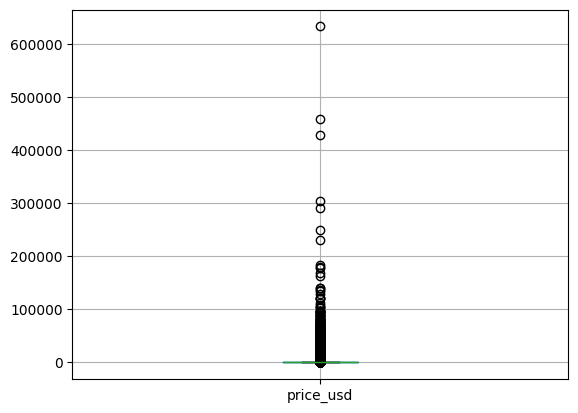

In [16]:
data[["price_usd"]].boxplot();

In [17]:
top_20_brands = data['brand_name'].value_counts().head(20).index
filtered_data = data[data['brand_name'].isin(top_20_brands)]
# Filter the DataFrame to include only the top 20 brands

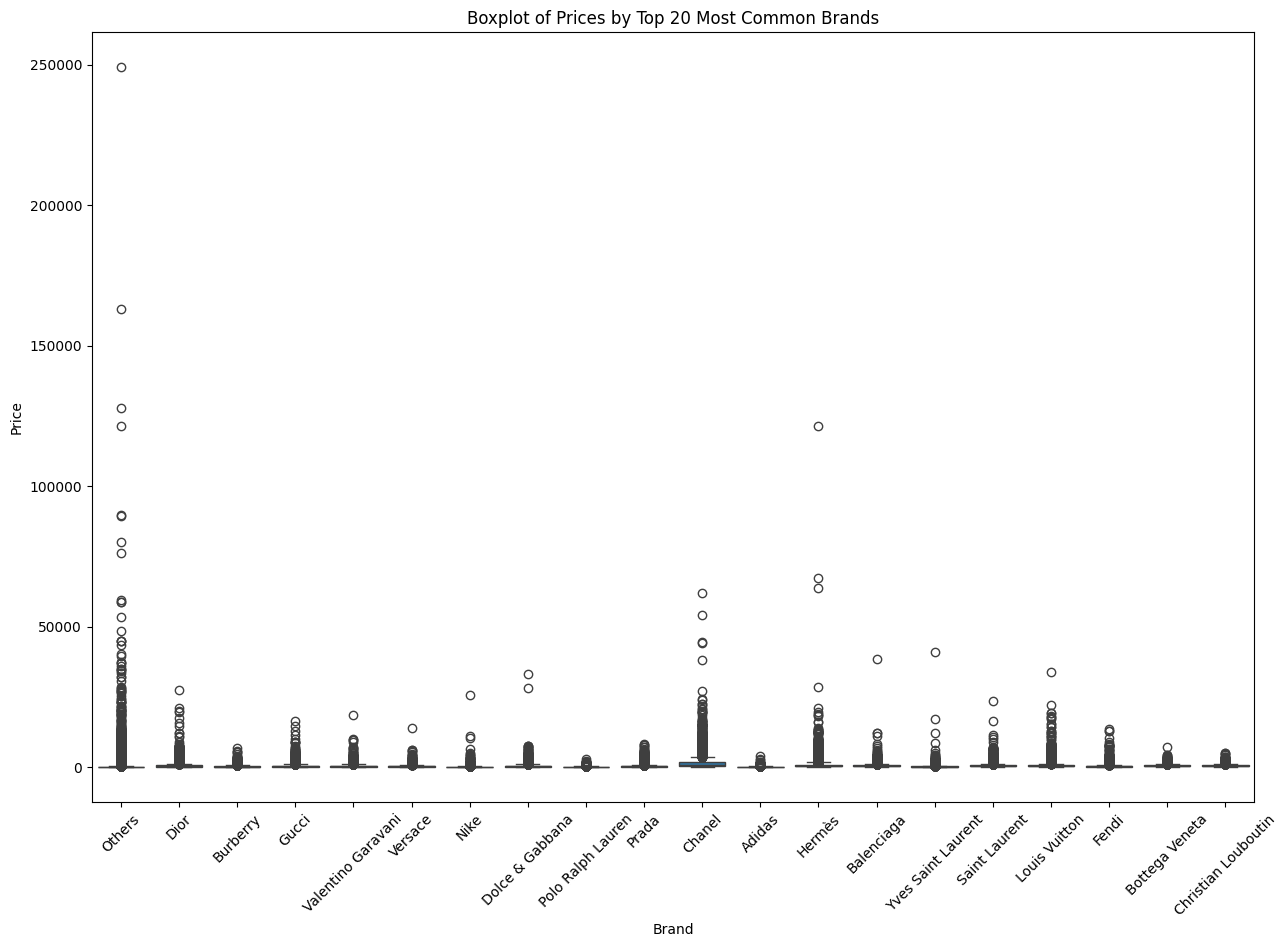

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

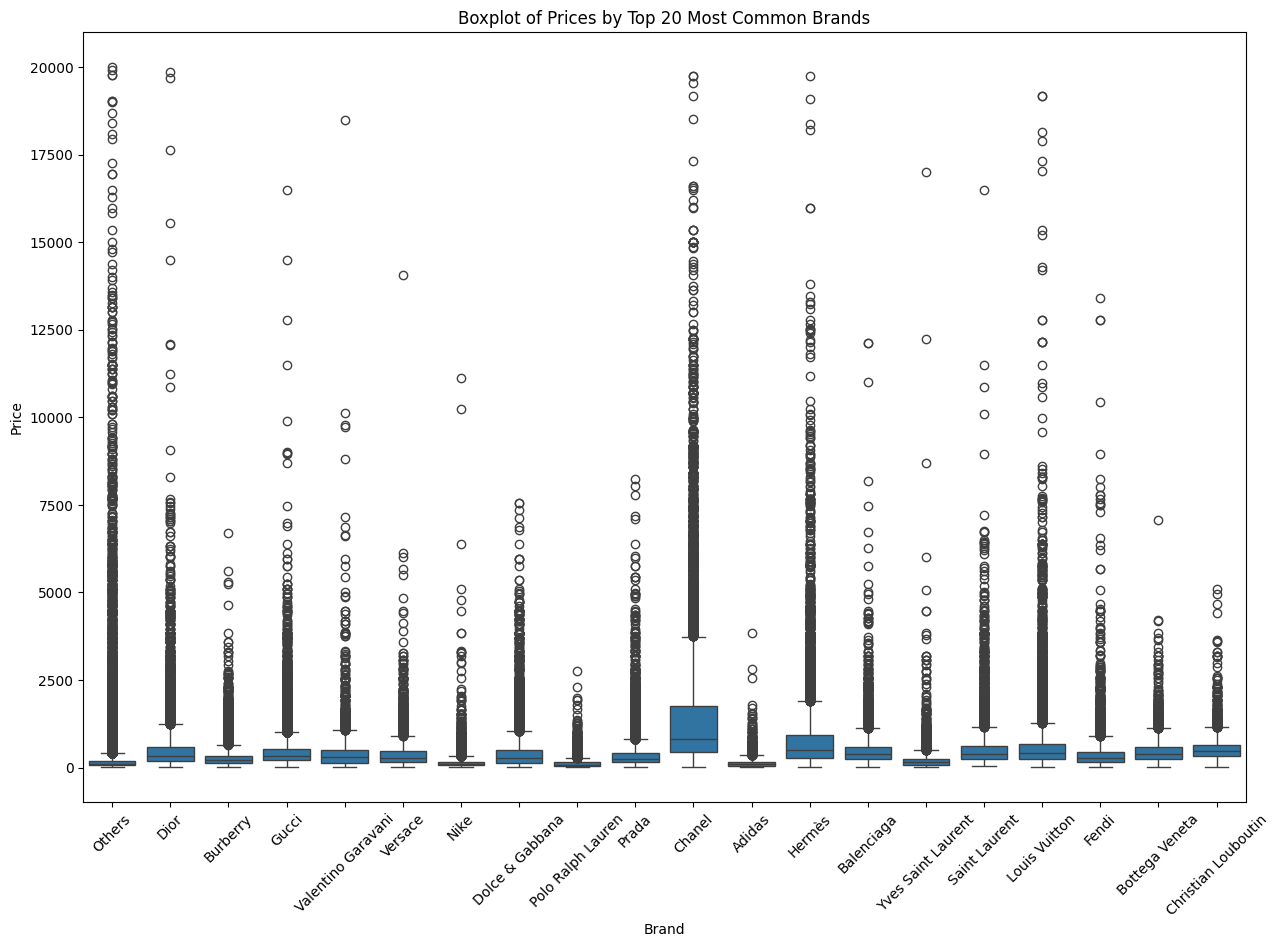

In [19]:
# Save the indexes corresponding to rows 
# without very high values (price < 200.000)
boolean_mask = (filtered_data['price_usd']<20000) 

# Apply the boolean filtering
filtered_data_boolean = filtered_data[boolean_mask].reset_index(drop=True)

# Visualize the boxplot again
plt.figure(figsize=(15, 10))
sns.boxplot(x='brand_name', y='price_usd', data=filtered_data_boolean)
plt.xticks(rotation=45)
plt.title('Boxplot of Prices by Top 20 Most Common Brands')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show();

## handling fees

In [20]:
data['buyers_fees'] = data['buyers_fees'].fillna(0)

In [21]:
data['has_cross_border_fees'] =  data['has_cross_border_fees'].fillna(False)

/tmp/ipykernel_91893/2670344606.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['has_cross_border_fees'] =  data['has_cross_border_fees'].fillna(False)


In [22]:
from sklearn.impute import SimpleImputer

# Step 1: Calculate the overall most frequent value
overall_most_frequent_value = data['usually_ships_within'].mode()[0]

# Step 2: Define the imputation function
def impute_most_frequent(group):
    # Check if all values in the group are missing
    if group['usually_ships_within'].isnull().all():
        # Impute with the overall most frequent value
        group['usually_ships_within'] = overall_most_frequent_value
    else:
        imputer = SimpleImputer(strategy="most_frequent")
        # Reshape to 2D array because SimpleImputer expects it
        group_reshaped = group[['usually_ships_within']].values.reshape(-1, 1)
        imputed = imputer.fit_transform(group_reshaped)
        group['usually_ships_within'] = imputed.ravel()
    return group

# Step 3: Group by 'brand_name' and apply the imputation function
data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)



/tmp/ipykernel_91893/859509969.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('brand_name').apply(impute_most_frequent).reset_index(drop=True)


In [23]:
# Counting the percentage of NaN for each column
data.isnull().sum().sort_values(ascending=False)

product_category              1183
product_keywords              1183
seller_username                 39
product_description              7
product_material                 4
product_season                   2
product_color                    1
product_id                       0
product_name                     0
product_type                     0
product_condition                0
product_like_count               0
reserved                         0
sold                             0
available                        0
in_stock                         0
brand_id                         0
should_be_gone                   0
brand_url                        0
product_gender_target            0
brand_name                       0
price_usd                        0
seller_earning                   0
seller_price                     0
has_cross_border_fees            0
buyers_fees                      0
warehouse_name                   0
seller_badge                     0
seller_id           

In [24]:
data.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.0,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",1.0,...,Tourcoing,143269,stella143269,1-2 days,France,17.0,38.0,162473.0,45.0,76.0


In [25]:
data_cleaned = data.dropna()
data_cleaned.isnull().sum().sort_values(ascending=False)

product_id                    0
product_type                  0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
brand_id                      0
brand_name                    0
brand_url                     0
product_material              0
product_color                 0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
has_cross_border_fees         0
buyers_fees                   0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_p

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899278 entries, 0 to 900513
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_id                  899278 non-null  int64  
 1   product_type                899278 non-null  object 
 2   product_name                899278 non-null  object 
 3   product_description         899278 non-null  object 
 4   product_keywords            899278 non-null  object 
 5   product_gender_target       899278 non-null  object 
 6   product_category            899278 non-null  object 
 7   product_season              899278 non-null  object 
 8   product_condition           899278 non-null  object 
 9   product_like_count          899278 non-null  float64
 10  sold                        899278 non-null  bool   
 11  reserved                    899278 non-null  bool   
 12  available                   899278 non-null  bool   
 13  in_stock           

## Preprocessing

### Product_like_count
#### As it is very skewed I chose Robust Scaler

#### Feature Transformation/Engineering

If your feature is extremely skewed  
→
  consider Feature Engineering first (e.g. log(feature))
shell we do this?

# The following code is just how we would do without brands

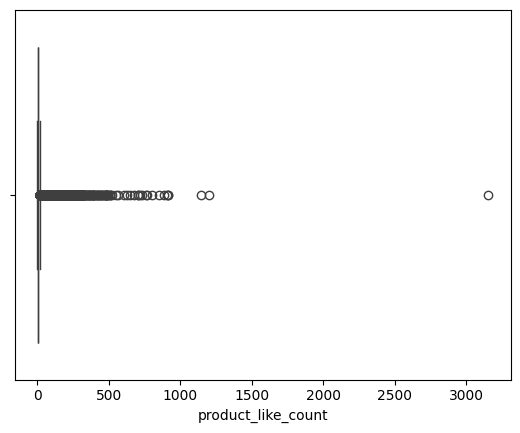

In [27]:
sns.boxplot(data=data_cleaned, x='product_like_count');
plt.show()

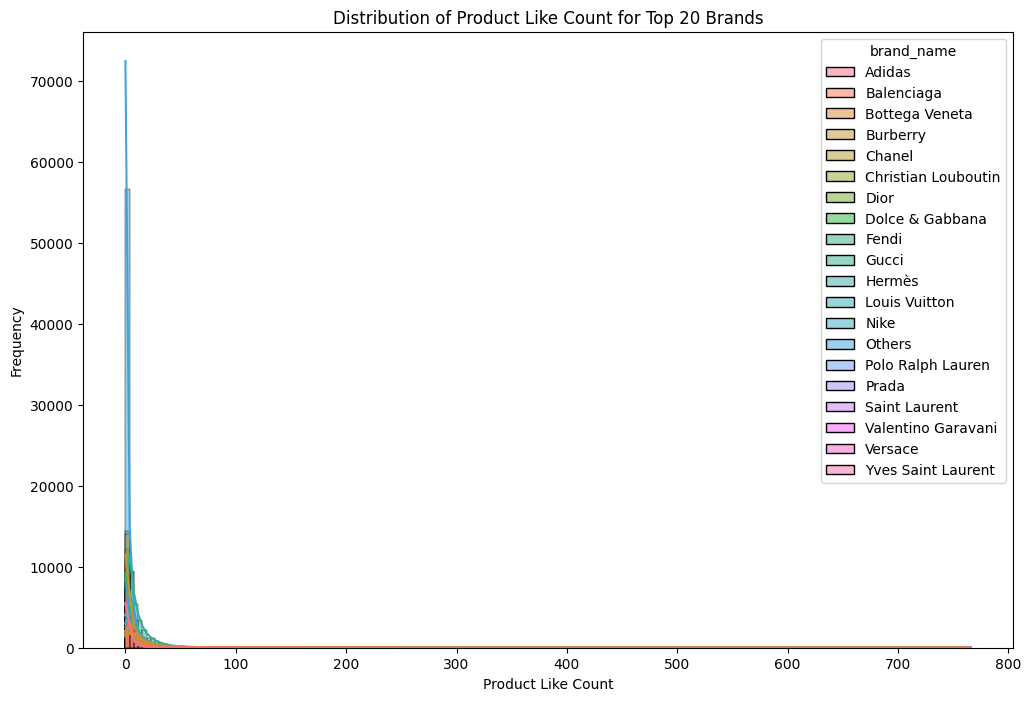

In [28]:
# Step 1: Identify the top 20 most common brands
top_brands = data_cleaned['brand_name'].value_counts().head(20).index

# Step 2: Filter the data to only include these top brands
filtered_data = data_cleaned[data_cleaned['brand_name'].isin(top_brands)]

# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
likes_hist = sns.histplot(filtered_data, x='product_like_count', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Product Like Count for Top 20 Brands')
plt.xlabel('Product Like Count')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Make sure that brand_name is only a column and not an index
data_cleaned = data_cleaned.reset_index(drop=True)

# Function to apply RobustScaler to each group
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['product_like_count'] = mm_scaler.fit_transform(group[['product_like_count']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/2958872948.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,2705.0,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,17.0,38.0,162473.0,45.0,76.0


### Seller_products_sold

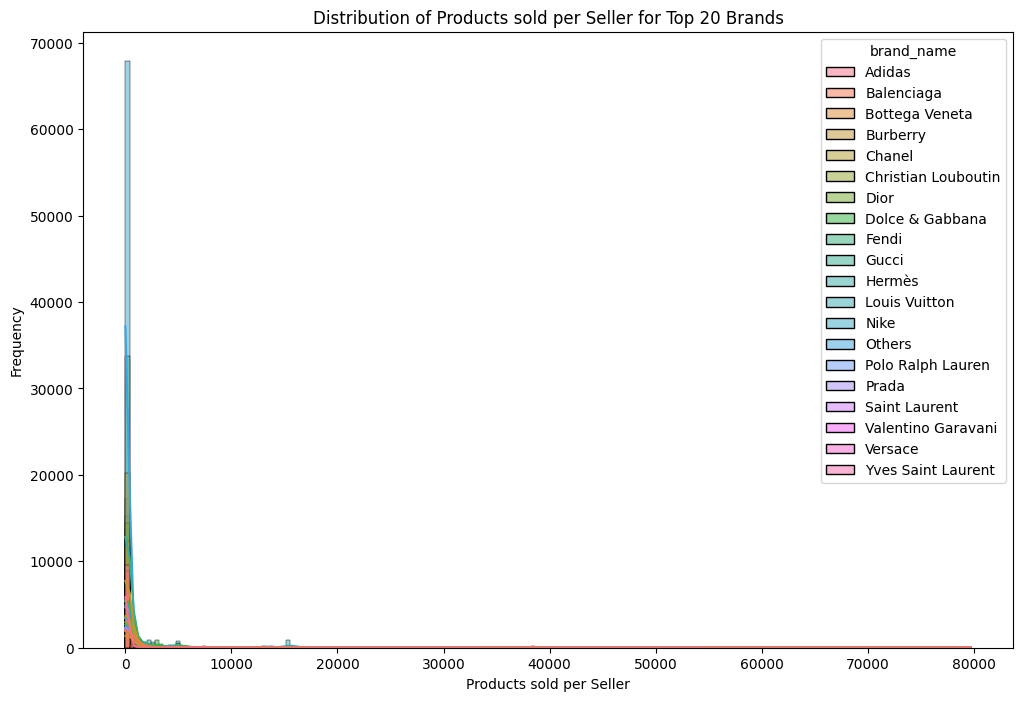

In [30]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_sold_hist = sns.histplot(filtered_data, x='seller_products_sold', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products sold per Seller for Top 20 Brands')
plt.xlabel('Products sold per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [31]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_products_sold'] = mm_scaler.fit_transform(group[['seller_products_sold']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/1212376400.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,3221.0,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,3221.0,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,3221.0,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,3221.0,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,38.0,162473.0,45.0,76.0


### Seller_num_products_listed 

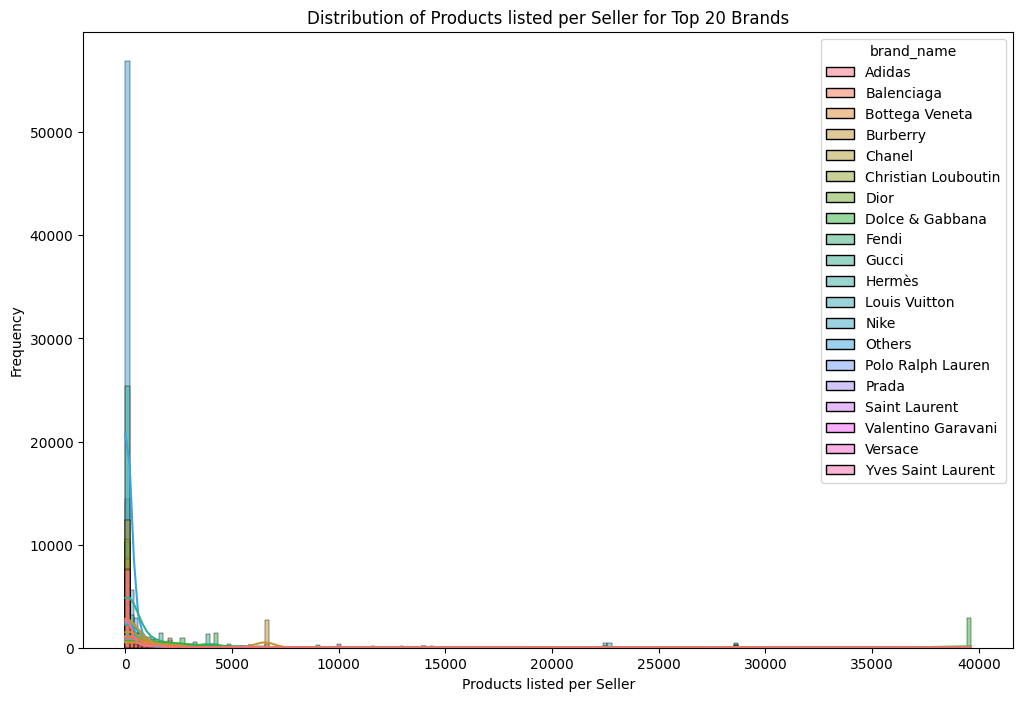

In [32]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
products_listed_hist = sns.histplot(filtered_data, x='seller_num_products_listed', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Products listed per Seller for Top 20 Brands')
plt.xlabel('Products listed per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [33]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_num_products_listed'] = mm_scaler.fit_transform(group[['seller_num_products_listed']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/37932814.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,6536.0,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,6536.0,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,6536.0,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,6536.0,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,0.007910,162473.0,45.0,76.0


### Seller_community_rank

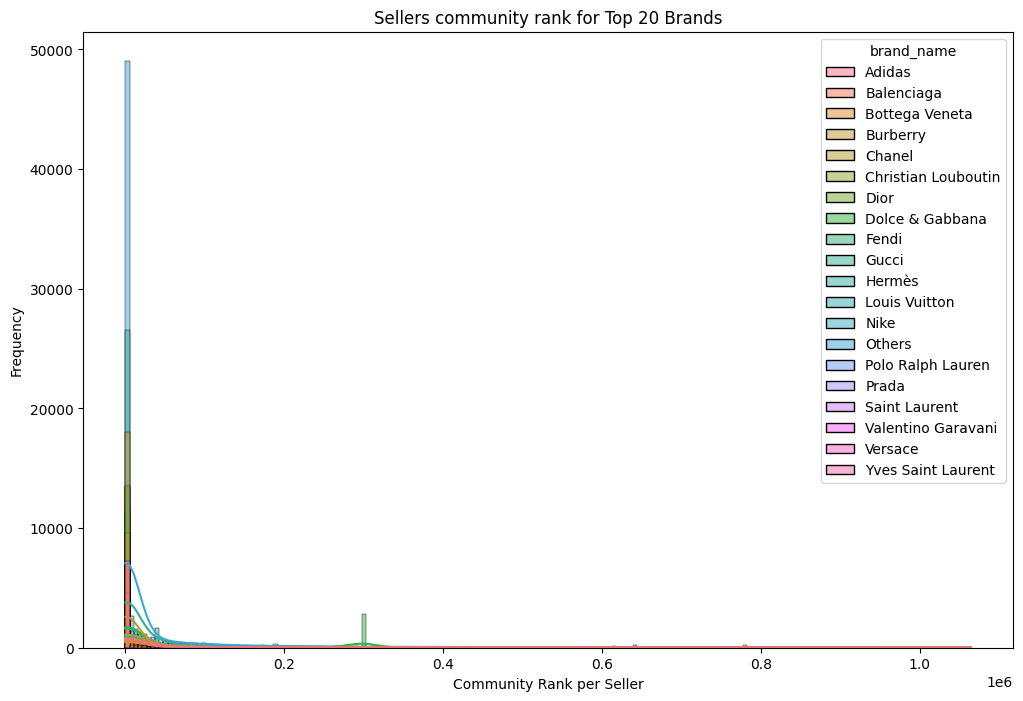

In [34]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
community_rank_hist = sns.histplot(filtered_data, x='seller_community_rank', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Sellers community rank for Top 20 Brands')
plt.xlabel('Community Rank per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [35]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_community_rank'] = mm_scaler.fit_transform(group[['seller_community_rank']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/1141746647.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,1758.0,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,1758.0,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,1758.0,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,1758.0,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,0.007910,0.163258,45.0,76.0


### Seller_num_followers

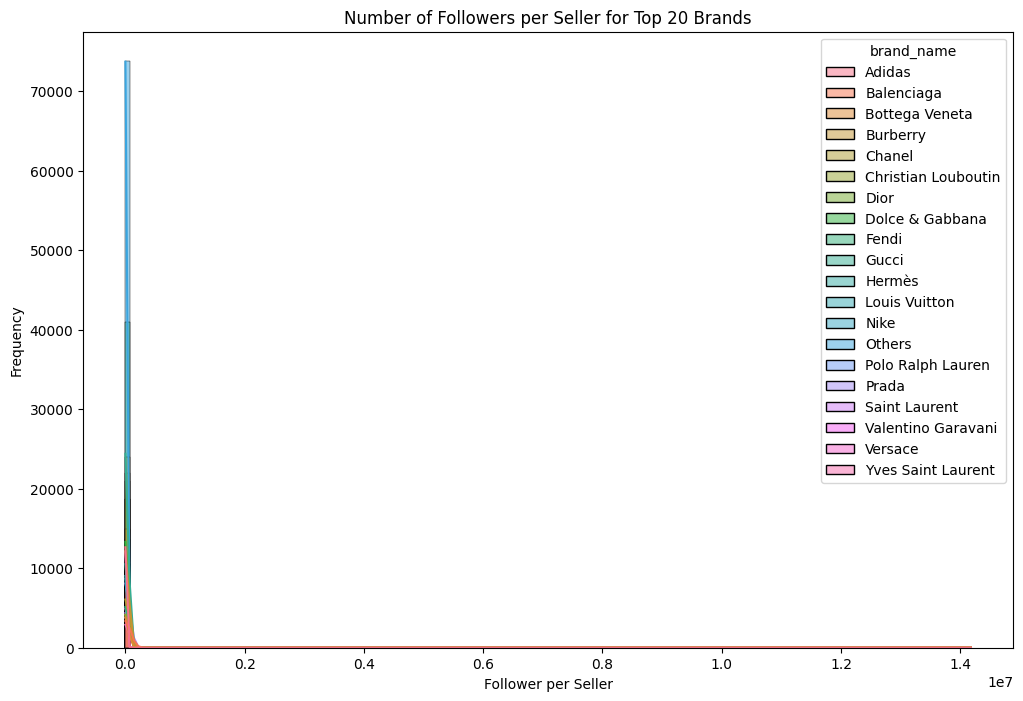

In [36]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
num_followers_hist = sns.histplot(filtered_data, x='seller_num_followers', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Number of Followers per Seller for Top 20 Brands')
plt.xlabel('Follower per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [37]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_num_followers'] = mm_scaler.fit_transform(group[['seller_num_followers']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/3718309317.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,79.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,79.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,79.0
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,79.0
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,0.007910,0.163258,0.002696,76.0


### Seller_pass_rate

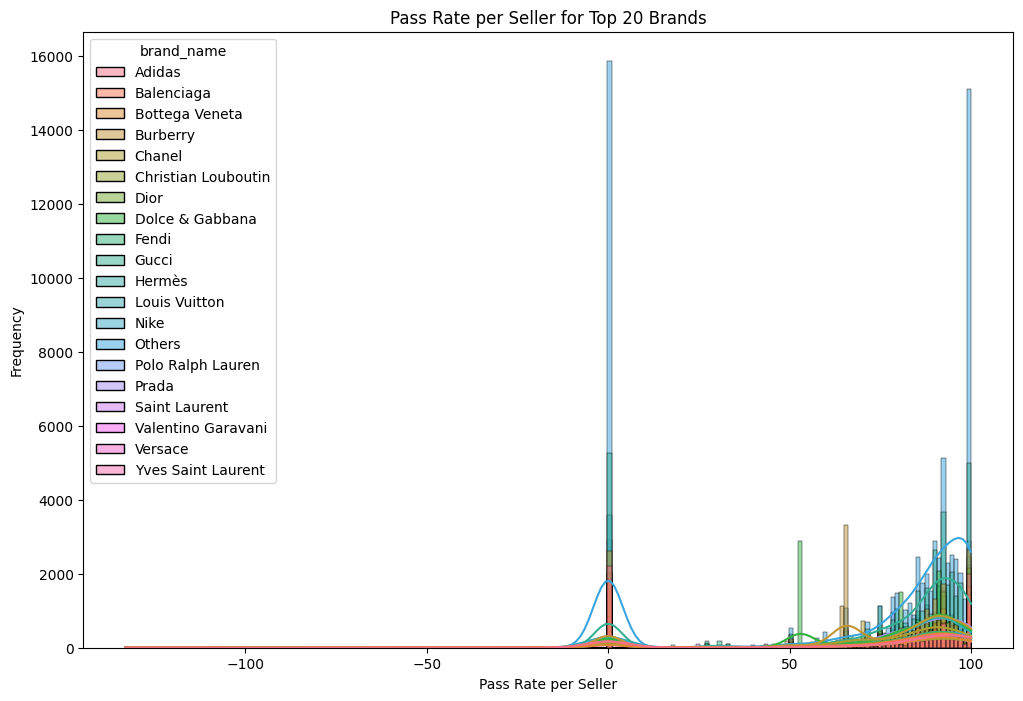

In [38]:
# Step 3: Plot the histogram
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
pass_rate_hist = sns.histplot(filtered_data, x='seller_pass_rate', hue='brand_name', bins=200, kde=True)

# Add labels and title for clarity
plt.title('Pass Rate per Seller for Top 20 Brands')
plt.xlabel('Pass Rate per Seller')
plt.ylabel('Frequency')

# Show the plot
plt.show();

In [39]:
def scale_group(group):
    mm_scaler = MinMaxScaler()
    group['seller_pass_rate'] = mm_scaler.fit_transform(group[['seller_pass_rate']])
    return group

# Apply the function to each group
# Using group_keys=False to avoid adding the group name back as an index level
data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


# Reset the index to ensure 'brand_name' is a column, not an index
data_cleaned = data_cleaned.reset_index(drop=True)


# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_91893/554353933.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(scale_group)


,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,0.007910,0.163258,0.002696,0.76


In [40]:
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Very good condition,0.02381,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women,Women Clothing,All seasons,Very good condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women,Women Clothing,All seasons,Fair condition,0.00000,...,Tourcoing,15397859,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",0.02381,...,Tourcoing,143269,stella143269,1-2 days,France,0.001295,0.007910,0.163258,0.002696,0.76


### Product_gender_target

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (3)
print(f"The unique values for 'Product_gender_target' are {data_cleaned.product_gender_target.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output = False) 

# Fit encoder
ohe.fit(data_cleaned[['product_gender_target']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

# Transform the current "Street" column
data_cleaned[ohe.get_feature_names_out()] = ohe.transform(data_cleaned[['product_gender_target']])

# Drop the column "Street" which has been encoded
data_cleaned = data_cleaned.drop(columns = ["product_gender_target"])

The unique values for 'Product_gender_target' are ['Women' 'Men']
The categories detected by the OneHotEncoder are [array(['Men', 'Women'], dtype=object)]


In [42]:
# Show the dataset
data_cleaned.head(3)

,product_id,product_type,product_name,product_description,product_keywords,product_category,product_season,product_condition,product_like_count,sold,...,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,product_gender_target_Men,product_gender_target_Women
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Very good condition,0.02381,False,...,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,mai15397859,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0


## Cluster Variables with huge amount of unique values

### brands_occurrence

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Create a DataFrame with brand names and their occurrences
brand_occurrences = data_cleaned['brand_name'].value_counts().reset_index()
brand_occurrences.columns = ['brand_name', 'occurrences']

# Display the occurrences
print("\nBrand Occurrences:")
brand_occurrences


Brand Occurrences:


,brand_name,occurrences
0,Others,73828
1,Gucci,41008
2,Burberry,24018
3,Dolce & Gabbana,22024
4,Prada,20972
...,...,...
1230,Merci,61
1231,Barneys New York,30
1232,G-STAR RAW,25
1233,A.L.C,16


In [48]:
# Number of clusters
n_clusters = 20

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model using only the 'occurrences' column
brand_occurrences['cluster'] = kmeans.fit_predict(brand_occurrences[['occurrences']])

# Calculate the mean occurrences for each cluster
cluster_summary = brand_occurrences.groupby('cluster')['occurrences'].mean().reset_index()
cluster_summary.columns = ['cluster', 'mean_occurrences']

# Sort clusters by mean occurrences
cluster_summary = cluster_summary.sort_values(by='mean_occurrences', ascending=True).reset_index(drop=True)

# Create a mapping from old cluster numbers to new cluster numbers
cluster_mapping = {old: new + 1 for new, old in enumerate(cluster_summary['cluster'])}
brand_occurrences['occurrences_cluster'] = brand_occurrences['cluster'].map(cluster_mapping)

# Display the updated clusters
print("\nClustered Brands by Occurrences with Updated Cluster Numbers:")
print(brand_occurrences)



Clustered Brands by Occurrences with Updated Cluster Numbers:
            brand_name  occurrences  cluster  occurrences_cluster
0               Others        73828        3                   20
1                Gucci        41008        1                   19
2             Burberry        24018       14                   18
3      Dolce & Gabbana        22024        6                   17
4                Prada        20972        6                   17
...                ...          ...      ...                  ...
1230             Merci           61       11                    1
1231  Barneys New York           30       11                    1
1232        G-STAR RAW           25       11                    1
1233             A.L.C           16       11                    1
1234        WRANGLER .           10       11                    1

[1235 rows x 4 columns]


In [50]:
# Merge the updated cluster information back into data_cleaned
data_cleaned = data_cleaned.merge(brand_occurrences[['brand_name', 'occurrences_cluster']], on='brand_name', how='left')

# Display the first few rows of the updated data_cleaned
print("\nUpdated data_cleaned with occurrences_cluster:")
data_cleaned.head()


Updated data_cleaned with occurrences_cluster:


,product_id,product_type,product_name,product_description,product_keywords,product_category,product_season,product_condition,product_like_count,sold,...,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,product_gender_target_Men,product_gender_target_Women,occurrences_cluster_x,occurrences_cluster_y
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,4,4
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Very good condition,0.02381,False,...,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,4,4
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,4,4
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Fair condition,0.00000,False,...,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,4,4
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women Clothing,All seasons,"Never worn, with tag",0.02381,False,...,France,0.001295,0.007910,0.163258,0.002696,0.76,0.0,1.0,4,4


### seller_products_sold

In [71]:
brand_occurrences = data_cleaned['brand_name'].value_counts().reset_index()
brand_occurrences.columns = ['brand_name', 'occurrences']

# Display the occurrences
print("\nBrand Occurrences:")
print(brand_occurrences)
n_clusters = 20

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model using only the 'occurrences' column
brand_occurrences['cluster'] = kmeans.fit_predict(brand_occurrences[['occurrences']])

# Display the resulting clusters
print("\nClustered Brands by Occurrences:")
print(brand_occurrences)
data_cleaned = data_cleaned.merge(brand_occurrences[['brand_name', 'cluster']], on='brand_name', how='left')


Brand Occurrences:
                             brand_name  occurrences  cluster
0                                Others        73828        3
1                                 Gucci        41008        1
2                              Burberry        24018       14
3                       Dolce & Gabbana        22024        6
4                                 Prada        20972        6
5                                Hermès        18711       15
6                         Louis Vuitton        18673       15
7                                Chanel        15006        2
8                                  Nike        13621        2
9                    Valentino Garavani        10641        8
10                           Balenciaga        10571        8
11                                 Dior        10492        8
12                                Fendi        10460        8
13                               Adidas        10030       18
14                        Saint Laurent         98

KeyError: "None of [Index(['occurrences_scaled'], dtype='object')] are in the [columns]"

In [51]:
# Calculate the range of occurrences for each cluster
range_df = brand_occurrences.groupby('cluster').agg(
    min_occurrences=('occurrences', 'min'),
    max_occurrences=('occurrences', 'max'),
    brands_in_cluster=('brand_name', 'size')  # Count the number of brands in each cluster
).reset_index()

# Display the range for each cluster
print("\nRange of Occurrences by Cluster:")
range_df.sort_values(by='min_occurrences')


Range of Occurrences by Cluster:


,cluster,min_occurrences,max_occurrences,brands_in_cluster
11,11,10,180,662
0,0,181,368,240
16,16,370,602,113
13,13,604,853,58
19,19,866,1148,35
7,7,1250,1631,24
17,17,1687,2235,27
10,10,2257,2904,21
5,5,3089,3830,16
12,12,4100,5051,12


### seller_num_products_listed

### seller_community_rank

### seller_num_followers

In [49]:
data_cleaned.head()

,product_id,product_type,product_name,product_description,product_keywords,product_category,product_season,product_condition,product_like_count,sold,...,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,product_gender_target_Men,product_gender_target_Women,cluster
0,43245272,Dress,Dress & Other Stories Black size 38 FR in Cotton,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Cotton Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
1,43245293,Jacket,Jacket & Other Stories Black size 34 FR in Pol...,& Other Stories-undefined. Size 34 (EU). Very ...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Very good condition,0.02381,False,...,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
2,43245263,Dress,Dress & Other Stories Multicolour size 38 FR i...,& Other Stories-dress. Size 38 (EU). Very good...,& Other Stories Synthetic Dresses,Women Clothing,All seasons,Very good condition,0.00000,False,...,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
3,43245290,Jacket,Jacket & Other Stories White size S Internatio...,& Other Stories-jacket. Size S (EU). Fair cond...,& Other Stories Polyester Jackets,Women Clothing,All seasons,Fair condition,0.00000,False,...,3-5 days,Sweden,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
4,43245051,Maxi dress,Maxi dress & Other Stories Black size 38 FR in...,Slightly high collar. Long sleeves. Entirely e...,& Other Stories Polyester Dresses,Women Clothing,All seasons,"Never worn, with tag",0.02381,False,...,1-2 days,France,0.001295,0.007910,0.163258,0.002696,0.76,0.0,1.0,13


### Preprocess the categorical data

In [51]:
cat_features = data_cleaned.select_dtypes(include=['object','bool']).columns
cat_features

Index(['product_type', 'product_name', 'product_description',
       'product_keywords', 'product_category', 'product_season',
       'product_condition', 'sold', 'reserved', 'available', 'in_stock',
       'should_be_gone', 'brand_name', 'brand_url', 'product_material',
       'product_color', 'seller_badge', 'has_cross_border_fees',
       'warehouse_name', 'seller_username', 'usually_ships_within',
       'seller_country'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
# Define the function for label encoding
def labelencoder(data_cleaned):
    for c in data_cleaned.columns:
        if data_cleaned[c].dtype == 'object' or data_cleaned[c].dtype == 'bool':
            lbl = LabelEncoder()
            data_cleaned[c] = data_cleaned[c].astype(str)  # Convert to string to handle mixed types and avoid errors
            data_cleaned[c] = lbl.fit_transform(data_cleaned[c])
    return data_cleaned

# Apply the labelencoder to each group based on brand_name
try:
    data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(labelencoder)
except Exception as e:
    print(f"Error occurred: {e}")

# Reset the index again to clean up the resulting DataFrame
data_cleaned = data_cleaned.reset_index(drop=True)

# Display the first few rows of the transformed data
data_cleaned.head()

/tmp/ipykernel_83792/1031519297.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_cleaned = data_cleaned.groupby('brand_name', group_keys=False).apply(labelencoder)


,product_id,product_type,product_name,product_description,product_keywords,product_category,product_season,product_condition,product_like_count,sold,...,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,product_gender_target_Men,product_gender_target_Women,cluster
0,43245272,25,98,101,13,4,0,4,0.00000,0,...,1,28,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
1,43245293,40,153,153,87,4,0,4,0.02381,0,...,1,28,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
2,43245263,25,115,101,117,4,0,4,0.00000,0,...,1,28,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
3,43245290,40,165,115,87,4,0,0,0.00000,0,...,1,28,0.206032,0.670483,0.006568,0.107666,0.79,0.0,1.0,13
4,43245051,87,328,593,84,4,0,3,0.02381,0,...,0,9,0.001295,0.007910,0.163258,0.002696,0.76,0.0,1.0,13


## Observing the Correlartion

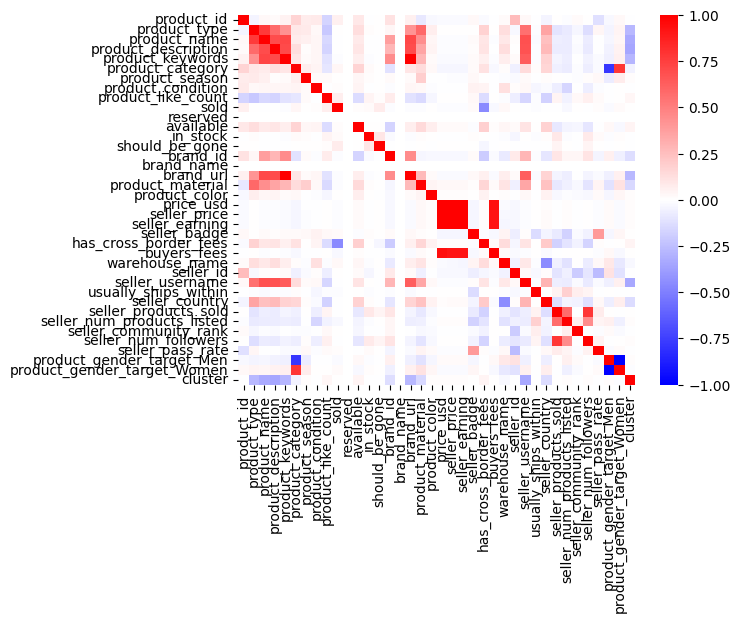

In [53]:
%matplotlib inline

# Standard import for matplotlib
import matplotlib.pyplot as plt

# Your plotting code
correlation_matrix = data_cleaned.select_dtypes('number').corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap="bwr")

# Make sure to show the plot
plt.show();

In [54]:
# Convert the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Rename the columns
corr_df.columns = ['feature_1', 'feature_2', 'correlation']

# Remove self correlations
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

# Create a unique identifier for each pair (sorted to ensure uniqueness)
corr_df['pair'] = np.where(corr_df['feature_1'] < corr_df['feature_2'],
                           corr_df['feature_1'] + '-' + corr_df['feature_2'],
                           corr_df['feature_2'] + '-' + corr_df['feature_1'])

# Drop duplicate pairs
corr_df_unique = corr_df.drop_duplicates(subset='pair', keep='first')

# Compute the absolute correlation using .loc to avoid SettingWithCopyWarning
corr_df_unique.loc[:, 'absolute_correlation'] = np.abs(corr_df_unique['correlation'])

# Sort by absolute correlation and show top pairs
top_corr_pairs = corr_df_unique.sort_values(by="absolute_correlation", ascending=False)
# Display the result
pd.set_option('display.max_rows', None)  
display(top_corr_pairs)

/tmp/ipykernel_83792/2365905297.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df_unique.loc[:, 'absolute_correlation'] = np.abs(corr_df_unique['correlation'])


,feature_1,feature_2,correlation,pair,absolute_correlation
1222,product_gender_target_Men,product_gender_target_Women,-1.000000,product_gender_target_Men-product_gender_targe...,1.000000
667,seller_price,seller_earning,0.998985,seller_earning-seller_price,0.998985
630,price_usd,seller_price,0.998117,price_usd-seller_price,0.998117
631,price_usd,seller_earning,0.997447,price_usd-seller_earning,0.997447
158,product_keywords,brand_url,0.992957,brand_url-product_keywords,0.992957
634,price_usd,buyers_fees,0.940521,buyers_fees-price_usd,0.940521
706,seller_earning,buyers_fees,0.919288,buyers_fees-seller_earning,0.919288
670,seller_price,buyers_fees,0.917984,buyers_fees-seller_price,0.917984
214,product_category,product_gender_target_Women,0.788470,product_category-product_gender_target_Women,0.788470
213,product_category,product_gender_target_Men,-0.788470,product_category-product_gender_target_Men,0.788470


In [55]:
# checking for number of unique cat values for each cat feature
data_cleaned.nunique().reset_index(name='cardinality')

,index,cardinality
0,product_id,899278
1,product_type,1271
2,product_name,61167
3,product_description,71427
4,product_keywords,41311
5,product_category,6
6,product_season,3
7,product_condition,5
8,product_like_count,8108
9,sold,2


In [56]:
y = data_cleaned['price_usd']
X_processed = data_cleaned.drop(columns=['price_usd', 'product_id', 'product_name', 'product_description', 'product_keywords','brand_id', 'brand_name', 'brand_url', 'seller_price', 'seller_earning', 'seller_id', 'seller_username', 'seller_community_rank', 'seller_num_followers'])

In [57]:
X_processed.nunique()

product_type                    1271
product_category                   6
product_season                     3
product_condition                  5
product_like_count              8108
sold                               2
reserved                           1
available                          2
in_stock                           2
should_be_gone                     2
product_material                  69
product_color                     25
seller_badge                       3
has_cross_border_fees              2
buyers_fees                    15776
warehouse_name                     5
usually_ships_within               4
seller_country                    70
seller_products_sold           46046
seller_num_products_listed     60778
seller_pass_rate                 689
product_gender_target_Men          2
product_gender_target_Women        2
cluster                           20
dtype: int64

In [58]:
import random
n=len(X_processed)
N=list(range(n))
random.shuffle(N)
X_sample=X_processed.iloc[N[0:50000]]
y_sample = y.iloc[N[0:50000]]
y_sample.shape, X_sample.shape

((50000,), (50000, 24))

In [59]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000, 24), (15000, 24), (35000,), (15000,))

In [60]:
# using cross validation to train the baseline model
base_model = LinearRegression()

base_result = cross_val_score(base_model, X_train, y_train, cv=5, n_jobs=-1, scoring='r2').mean()

In [61]:
base_result

np.float64(0.8615028387168457)

## Company Data

In [75]:
company_data = pd.read_csv("~/code/aplabey/2nd_hand_fashion_valuation/raw_data/companiesmarketcap.com - Largest clothing companies by market cap.csv")

In [89]:
company_data

,Rank,Name,Symbol,marketcap,price (USD),country
0,1,lvmh,MC.PA,373964627880,748.756000,France
1,2,hermès,RMS.PA,252313020228,2406.280000,France
2,3,inditex,IDEXY,168790671360,27.110000,Spain
3,4,tjx companies,TJX,132265304064,117.270000,United States
4,5,nike,NKE,124926672896,83.320000,United States
5,6,dior,CDI.PA,124789434444,691.695000,France
6,7,fast retailing,9983.T,98447764372,320.967000,Japan
7,8,cintas,CTAS,81131134976,805.120000,United States
8,9,ross stores,ROST,50239733760,150.610000,United States
9,10,adidas,ADS.DE,45313495858,253.787000,Germany


In [90]:
# Convert the 'Name' column in company_data to lowercase
company_data['Name'] = company_data['Name'].str.lower()

# Convert the 'brand_name' column in data_cleaned to lowercase
data['brand_name'] = data['brand_name'].str.lower()

# Merge the two DataFrames on the lowercase columns
merged_df = pd.merge(data, company_data, left_on='brand_name', right_on='Name', how='left')


# Display the first few rows of the merged DataFrame
merged_df.head(150)

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate,Rank,Name,Symbol,marketcap,price (USD),country
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,14.0,0.0,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,0.0,0.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,69.0,0.0,62.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,274.0,126346.0,131.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,14.0,102821.0,40.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN
5,43246347,Mid-length dress,Mid,"See By Chloe white dress, size 42 IT (size lik...",See by Chloé Cotton - elasthane Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,22.0,493200.0,21.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
6,43246327,Silk trousers,Silk trousers Just Cavalli Black size 40 IT in...,Amazing flamingo three quarters trousers 100 s...,Just Cavalli Silk Trousers,Women,Women Clothing,All seasons,Never worn,1.0,...,8.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,43246317,Silk mid-length dress,Silk mid,Plaid sleeveless below knee silk dress. Worn ...,J.Crew Silk Dresses,Women,Women Clothing,All seasons,Very good condition,0.0,...,41.0,0.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN
8,43246287,Suit jacket,Suit jacket Aquascutum Beige size 46 IT in Cot...,Aquascutum classic cut short sleeve jacket and...,Aquascutum Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,0.0,...,49.0,283504.0,34.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
9,43246247,Wool suit jacket,Wool suit jacket Dior Grey size 40 FR in Wool,Tweed suit with lace edges. In perfect conditi...,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,6.0,4692.0,375.0,95.0,6.0,dior,CDI.PA,1.247894e+11,691.69500,France


In [85]:
num_matches = len(merged_df)
print(f"Number of matched names: {num_matches}")

Number of matched names: 900514


In [86]:
num_data = len(data)
num_company_data = len(company_data)

# Number of unmatched names in each DataFrame
num_unmatched_data = num_data - num_matches
num_unmatched_company_data = num_company_data - len(merged_df['Name'].unique())

print(f"Number of unmatched names in data: {num_unmatched_data}")
print(f"Number of unmatched names in company_data: {num_unmatched_company_data}")

Number of unmatched names in data: 0
Number of unmatched names in company_data: 93


In [91]:
merged_df.isnull().sum().sort_values(ascending=False)

country                       781442
price (USD)                   781442
Rank                          781442
Name                          781442
Symbol                        781442
marketcap                     781442
usually_ships_within          154791
buyers_fees                    13736
has_cross_border_fees          13736
product_category                1183
product_keywords                1183
seller_username                   39
product_description                7
product_material                   4
product_season                     2
product_color                      1
product_id                         0
product_type                       0
product_like_count                 0
product_condition                  0
product_name                       0
product_gender_target              0
sold                               0
reserved                           0
available                          0
in_stock                           0
seller_earning                     0
s